In [0]:
import pandas as pd
import scipy.special
import matplotlib.pyplot as plt
import os
import random

In [0]:
path_in = '../input/ashrae-energy-prediction/'
print(os.listdir(path_in))

['sample_submission.csv', 'building_metadata.csv', 'weather_test.csv', 'train.csv', 'test.csv', 'weather_train.csv']


In [0]:
train = pd.read_csv(path_in+'train.csv', parse_dates=['timestamp'])
weather = pd.read_csv(path_in+'weather_train.csv', parse_dates=['timestamp'])
meta = pd.read_csv(path_in+'building_metadata.csv')

In [0]:
train.shape

(20216100, 4)

In [0]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [0]:
train.building_id.isnull().sum()

0

In [0]:
train.meter.isnull().sum()

0

In [0]:
train.timestamp.isnull().sum()

0

In [0]:
train.meter_reading.isnull().sum()

0

In [0]:
meta.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [0]:
meta.site_id.isnull().sum()

0

In [0]:
meta.primary_use.isnull().sum()

0

In [0]:
meta.year_built.isnull().sum()

774

In [0]:
meta.floor_count.isnull().sum()

1094

In [0]:
meta.shape

(1449, 6)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
meta.primary_use.value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

In [0]:
meta.drop("floor_count",axis=1,inplace=True)

In [0]:
meta.head()

,site_id,building_id,primary_use,square_feet,year_built
0,0,0,Education,7432,2008.0
1,0,1,Education,2720,2004.0
2,0,2,Education,5376,1991.0
3,0,3,Education,23685,2002.0
4,0,4,Education,116607,1975.0


In [0]:
meta.drop("year_built",axis=1,inplace=True)

In [0]:
meta.head()

,site_id,building_id,primary_use,square_feet
0,0,0,Education,7432
1,0,1,Education,2720
2,0,2,Education,5376
3,0,3,Education,23685
4,0,4,Education,116607


In [0]:
import numpy as np

In [0]:
square_feet = meta.square_feet.map(np.log)

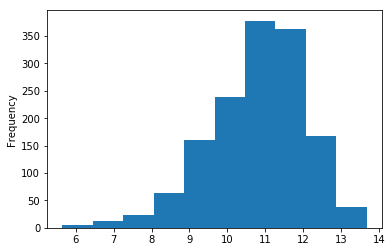

In [0]:
fig=square_feet.plot.hist()

In [0]:
meta.head()

,site_id,building_id,primary_use,square_feet
0,0,0,Education,7432
1,0,1,Education,2720
2,0,2,Education,5376
3,0,3,Education,23685
4,0,4,Education,116607


In [0]:
meta.square_feet=square_feet

In [0]:
meta.head()

,site_id,building_id,primary_use,square_feet
0,0,0,Education,8.913550
1,0,1,Education,7.908387
2,0,2,Education,8.589700
3,0,3,Education,10.072597
4,0,4,Education,11.666565


In [0]:
meta.head()

,site_id,building_id,primary_use,square_feet
0,0,0,Education,8.913550
1,0,1,Education,7.908387
2,0,2,Education,8.589700
3,0,3,Education,10.072597
4,0,4,Education,11.666565


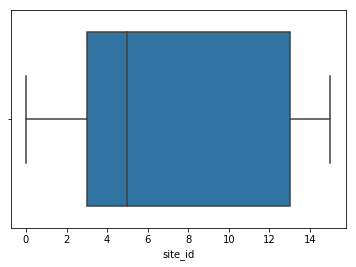

In [0]:
import seaborn as sns
sns.boxplot(x=meta['site_id'])

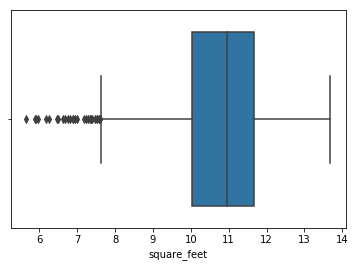

In [0]:
sns.boxplot(x=meta['square_feet'])

In [0]:
site_id = meta.site_id.map(np.log)

/opt/conda/lib/python3.6/site-packages/pandas/core/base.py:1300: RuntimeWarning: divide by zero encountered in log
  new_values = map_f(values, mapper)


In [0]:
meta.head()

,site_id,building_id,primary_use,square_feet
0,0,0,Education,8.913550
1,0,1,Education,7.908387
2,0,2,Education,8.589700
3,0,3,Education,10.072597
4,0,4,Education,11.666565


In [0]:
meta.primary_use.value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

In [0]:
l=['Healthcare', 'Parking', 'Warehouse/storage', 'Manufacturing/industrial', 'Manufacturing/industrial','Retail','Services','Religious worship','Technology/science','Food sales and service','Utility','Other']

In [0]:
l

['Healthcare',
 'Parking',
 'Warehouse/storage',
 'Manufacturing/industrial',
 'Manufacturing/industrial',
 'Retail',
 'Services',
 'Religious worship',
 'Technology/science',
 'Food sales and service',
 'Utility',
 'Other']

In [0]:
for x in l:
    meta.primary_use.replace(x,'other',inplace=True)

In [0]:
meta.head()

,site_id,building_id,primary_use,square_feet
0,0,0,Education,8.913550
1,0,1,Education,7.908387
2,0,2,Education,8.589700
3,0,3,Education,10.072597
4,0,4,Education,11.666565


In [0]:
meta.primary_use.value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
other                            134
Name: primary_use, dtype: int64

In [0]:
dummy = pd.get_dummies(meta.primary_use)

In [0]:
dummy.head()

,Education,Entertainment/public assembly,Lodging/residential,Office,Public services,other
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [0]:
meta = pd.concat([dummy,meta],axis = 1)

In [0]:
meta.head()

,Education,Entertainment/public assembly,Lodging/residential,Office,Public services,other,site_id,building_id,primary_use,square_feet
0,1,0,0,0,0,0,0,0,Education,8.913550
1,1,0,0,0,0,0,0,1,Education,7.908387
2,1,0,0,0,0,0,0,2,Education,8.589700
3,1,0,0,0,0,0,0,3,Education,10.072597
4,1,0,0,0,0,0,0,4,Education,11.666565


In [0]:
meta.head()

,Education,Entertainment/public assembly,Lodging/residential,Office,Public services,other,site_id,building_id,primary_use,square_feet
0,1,0,0,0,0,0,0,0,Education,8.913550
1,1,0,0,0,0,0,0,1,Education,7.908387
2,1,0,0,0,0,0,0,2,Education,8.589700
3,1,0,0,0,0,0,0,3,Education,10.072597
4,1,0,0,0,0,0,0,4,Education,11.666565


In [0]:
meta.head()

,Education,Entertainment/public assembly,Lodging/residential,Office,Public services,other,site_id,building_id,primary_use,square_feet
0,1,0,0,0,0,0,0,0,Education,8.913550
1,1,0,0,0,0,0,0,1,Education,7.908387
2,1,0,0,0,0,0,0,2,Education,8.589700
3,1,0,0,0,0,0,0,3,Education,10.072597
4,1,0,0,0,0,0,0,4,Education,11.666565


In [0]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [0]:
meta.site_id.isnull().sum()

0

In [0]:
meta.head()

,Education,Entertainment/public assembly,Lodging/residential,Office,Public services,other,site_id,building_id,primary_use,square_feet
0,1,0,0,0,0,0,0,0,Education,8.913550
1,1,0,0,0,0,0,0,1,Education,7.908387
2,1,0,0,0,0,0,0,2,Education,8.589700
3,1,0,0,0,0,0,0,3,Education,10.072597
4,1,0,0,0,0,0,0,4,Education,11.666565


In [0]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [0]:
train.meter.isnull().sum()

0

In [0]:
train.timestamp.isnull().sum()

0

In [0]:
train.meter_reading.isnull().sum()

0

In [0]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


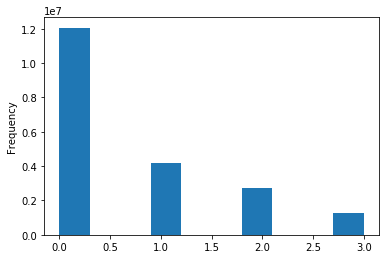

In [0]:
fig = train['meter'].plot.hist()

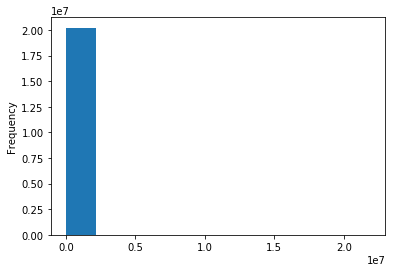

In [0]:
fig = train['meter_reading'].plot.hist()

In [0]:
train.meter_reading.describe()

count    2.021610e+07
mean     2.117121e+03
std      1.532356e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.877500e+01
75%      2.679840e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

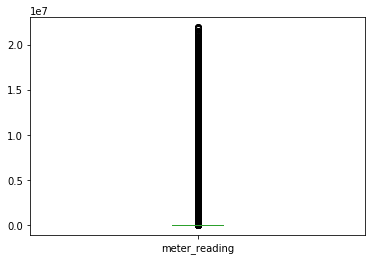

In [0]:
fig=train.meter_reading.plot.box()

In [0]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [0]:
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


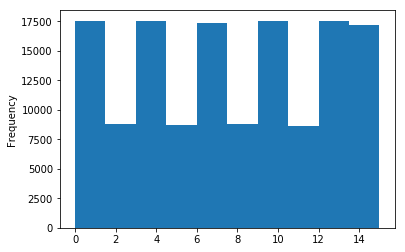

In [0]:
fig = weather['site_id'].plot.hist()

In [0]:
weather.shape

(139773, 9)

train.shape

In [0]:
train.shape

(20216100, 4)

In [0]:
meta.shape

(1449, 10)

In [0]:
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [0]:
weather.air_temperature.isnull().sum()

55

In [0]:
weather.cloud_coverage.isnull().sum()

69173

In [0]:
weather.dew_temperature.isnull().sum()

113

In [0]:
weather.precip_depth_1_hr.isnull().sum()

50289

In [0]:
weather.wind_direction.isnull().sum()

6268

In [0]:
weather.wind_speed.isnull().sum()

304

# air_temperature

In [0]:
weather.air_temperature.isnull().sum()

55

In [0]:
weather['air_temperature'] = weather['air_temperature'].replace(np.nan, weather.air_temperature.mean())

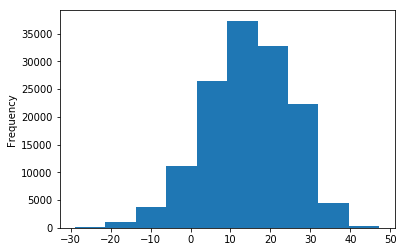

In [0]:
fig = weather['air_temperature'].plot.hist()

In [0]:
air_temperature = (weather.air_temperature-weather.air_temperature.min())/(weather.air_temperature.max()-weather.air_temperature.min())

In [0]:
weather.air_temperature = air_temperature

In [0]:
weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,0.708279,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,0.700394,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,0.679369,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,0.657030,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,0.642576,2.0,20.0,-1.0,1020.0,250.0,2.6


# cloud_coverage

In [0]:
weather.cloud_coverage.isnull().sum()

69173

In [0]:
weather.shape

(139773, 9)

In [0]:
weather.drop("cloud_coverage",axis=1,inplace=True)

In [0]:
weather.head()

,site_id,timestamp,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,0.708279,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,0.700394,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,0.679369,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,0.657030,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,0.642576,20.0,-1.0,1020.0,250.0,2.6



# dew_temperature

In [0]:
weather.dew_temperature.isnull().sum()

113

In [0]:
weather['dew_temperature'] = weather['dew_temperature'].replace(np.nan, weather.dew_temperature.mean())

In [0]:
weather.dew_temperature.isnull().sum()

0

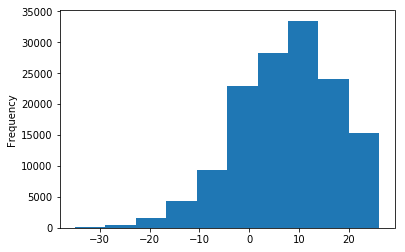

In [0]:
fig = weather['dew_temperature'].plot.hist()

In [0]:
dew_temperature = (weather.dew_temperature-weather.dew_temperature.min())/(weather.dew_temperature.max()-weather.dew_temperature.min())

In [0]:
weather.dew_temperature=dew_temperature

In [0]:
weather.head()

,site_id,timestamp,air_temperature,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,0.708279,0.900164,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,0.700394,0.918167,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,0.679369,0.918167,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,0.657030,0.909984,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,0.642576,0.900164,-1.0,1020.0,250.0,2.6


# precip_depth_1_hr

In [0]:
weather.precip_depth_1_hr.isnull().sum()

50289

In [0]:
weather.drop("precip_depth_1_hr",axis=1,inplace=True)

In [0]:
weather.head()

,site_id,timestamp,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,0.708279,0.900164,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,0.700394,0.918167,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,0.679369,0.918167,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,0.657030,0.909984,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,0.642576,0.900164,1020.0,250.0,2.6


# wind_direction

In [0]:
weather.wind_direction.isnull().sum()

6268

In [0]:
weather['wind_direction'] = weather['wind_direction'].replace(np.nan, weather.wind_direction.mean())

In [0]:
weather.wind_direction.isnull().sum()

0

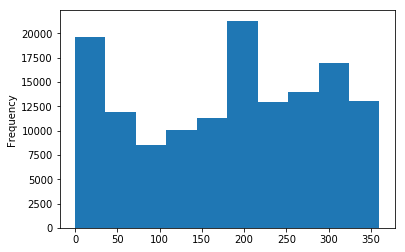

In [0]:
fig = weather['wind_direction'].plot.hist()

# wind_speed

In [0]:
weather.wind_speed.isnull().sum()

304

In [0]:
weather['wind_speed'] = weather['wind_speed'].replace(np.nan, weather.wind_speed.mean())

In [0]:
weather.wind_speed.isnull().sum()

0

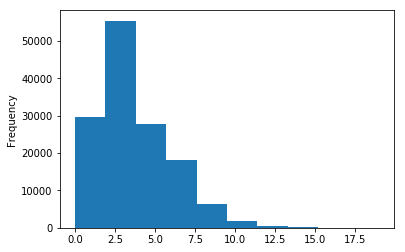

In [0]:
fig = weather['wind_speed'].plot.hist()

In [0]:

weather.head()

,site_id,timestamp,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,0.708279,0.900164,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,0.700394,0.918167,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,0.679369,0.918167,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,0.657030,0.909984,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,0.642576,0.900164,1020.0,250.0,2.6


# sea_level_pressure

In [0]:
weather.sea_level_pressure.isnull().sum()

10618

In [0]:

weather.shape

(139773, 7)

In [0]:
weather['sea_level_pressure'] = weather['sea_level_pressure'].replace(np.nan, weather.sea_level_pressure.mean())

In [0]:
weather.sea_level_pressure.isnull().sum()

0

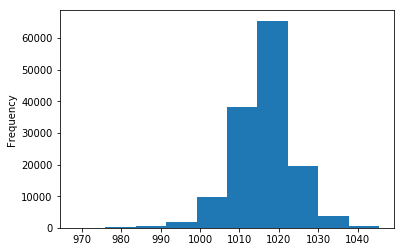

In [0]:
fig = weather['sea_level_pressure'].plot.hist()

In [0]:
sea_level_pressure = (weather.sea_level_pressure-weather.sea_level_pressure.min())/(weather.sea_level_pressure.max()-weather.sea_level_pressure.min())

In [0]:
sea_level_pressure = weather.sea_level_pressure

In [0]:
weather.head()

,site_id,timestamp,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,0.708279,0.900164,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,0.700394,0.918167,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,0.679369,0.918167,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,0.657030,0.909984,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,0.642576,0.900164,1020.0,250.0,2.6



# PCA LL TEMPERATURE

In [0]:
features = ['air_temperature','dew_temperature']

In [0]:
x = weather.loc[:, features].values

In [0]:
x

array([[0.70827858, 0.90016367],
       [0.70039422, 0.91816694],
       [0.67936925, 0.91816694],
       ...,
       [0.41655716, 0.45499182],
       [0.4086728 , 0.46317512],
       [0.4021025 , 0.4811784 ]])

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)

In [0]:
principalComponents

array([[-0.24795407],
       [-0.25666077],
       [-0.24313097],
       ...,
       [ 0.28052284],
       [ 0.2793327 ],
       [ 0.26978039]])

In [0]:
weather.head()

,site_id,timestamp,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,0.708279,0.900164,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,0.700394,0.918167,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,0.679369,0.918167,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,0.657030,0.909984,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,0.642576,0.900164,1020.0,250.0,2.6


In [0]:
weather.drop("air_temperature",axis=1,inplace=True)

In [0]:
weather.drop("dew_temperature",axis=1,inplace=True)

In [0]:
weather['temperature'] = principalComponents

In [0]:
weather['temperature'].isnull().sum()

0

In [0]:
weather.head()

,site_id,timestamp,sea_level_pressure,wind_direction,wind_speed,temperature
0,0,2016-01-01 00:00:00,1019.7,0.0,0.0,-0.247954
1,0,2016-01-01 01:00:00,1020.2,70.0,1.5,-0.256661
2,0,2016-01-01 02:00:00,1020.2,0.0,0.0,-0.243131
3,0,2016-01-01 03:00:00,1020.1,0.0,0.0,-0.222492
4,0,2016-01-01 04:00:00,1020.0,250.0,2.6,-0.205673


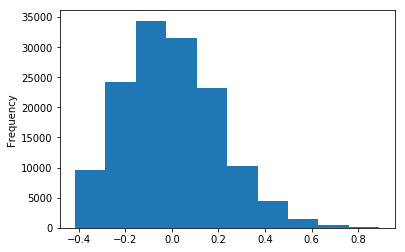

In [0]:
fig = weather['temperature'].plot.hist()

# PCA LL WIND

In [0]:
weather.dtypes

site_id                        int64
timestamp             datetime64[ns]
sea_level_pressure           float64
wind_direction               float64
wind_speed                   float64
temperature                  float64
dtype: object

In [0]:
wind_direction = (weather.wind_direction-weather.wind_direction.min())/(weather.wind_direction.max()-weather.wind_direction.min())

In [0]:
weather.wind_direction = wind_direction

In [0]:
wind_speed = (weather.wind_speed-weather.wind_speed.min())/(weather.wind_speed.max()-weather.wind_speed.min())

In [0]:
weather.wind_speed= wind_speed

In [0]:
weather.head()

,site_id,timestamp,sea_level_pressure,wind_direction,wind_speed,temperature
0,0,2016-01-01 00:00:00,1019.7,0.000000,0.000000,-0.247954
1,0,2016-01-01 01:00:00,1020.2,0.194444,0.078947,-0.256661
2,0,2016-01-01 02:00:00,1020.2,0.000000,0.000000,-0.243131
3,0,2016-01-01 03:00:00,1020.1,0.000000,0.000000,-0.222492
4,0,2016-01-01 04:00:00,1020.0,0.694444,0.136842,-0.205673


In [0]:
feature = ['wind_direction','wind_speed']

In [0]:
y = weather.loc[:, feature].values

In [0]:
pca = PCA(n_components=1)
wind= pca.fit_transform(y)

In [0]:
weather['wind']=wind

In [0]:
weather.wind.isnull().sum()

0

In [0]:
weather.head()

,site_id,timestamp,sea_level_pressure,wind_direction,wind_speed,temperature,wind
0,0,2016-01-01 00:00:00,1019.7,0.000000,0.000000,-0.247954,-0.525354
1,0,2016-01-01 01:00:00,1020.2,0.194444,0.078947,-0.256661,-0.320619
2,0,2016-01-01 02:00:00,1020.2,0.000000,0.000000,-0.243131,-0.525354
3,0,2016-01-01 03:00:00,1020.1,0.000000,0.000000,-0.222492,-0.525354
4,0,2016-01-01 04:00:00,1020.0,0.694444,0.136842,-0.205673,0.182119


In [0]:
weather.drop("wind_direction",axis=1,inplace=True)

In [0]:
weather.drop("wind_speed",axis=1,inplace=True)

In [0]:
weather.head()

,site_id,timestamp,sea_level_pressure,temperature,wind
0,0,2016-01-01 00:00:00,1019.7,-0.247954,-0.525354
1,0,2016-01-01 01:00:00,1020.2,-0.256661,-0.320619
2,0,2016-01-01 02:00:00,1020.2,-0.243131,-0.525354
3,0,2016-01-01 03:00:00,1020.1,-0.222492,-0.525354
4,0,2016-01-01 04:00:00,1020.0,-0.205673,0.182119


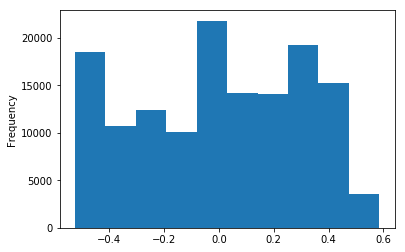

In [0]:
fig = weather['wind'].plot.hist()

In [0]:
weather.head()

,site_id,timestamp,sea_level_pressure,temperature,wind
0,0,2016-01-01 00:00:00,1019.7,-0.247954,-0.525354
1,0,2016-01-01 01:00:00,1020.2,-0.256661,-0.320619
2,0,2016-01-01 02:00:00,1020.2,-0.243131,-0.525354
3,0,2016-01-01 03:00:00,1020.1,-0.222492,-0.525354
4,0,2016-01-01 04:00:00,1020.0,-0.205673,0.182119


In [0]:
weather.head()

,site_id,timestamp,sea_level_pressure,temperature,wind
0,0,2016-01-01 00:00:00,1019.7,-0.247954,-0.525354
1,0,2016-01-01 01:00:00,1020.2,-0.256661,-0.320619
2,0,2016-01-01 02:00:00,1020.2,-0.243131,-0.525354
3,0,2016-01-01 03:00:00,1020.1,-0.222492,-0.525354
4,0,2016-01-01 04:00:00,1020.0,-0.205673,0.182119


In [0]:
sea_level_pressure = (weather.sea_level_pressure-weather.sea_level_pressure.min())/(weather.sea_level_pressure.max()-weather.sea_level_pressure.min())

In [0]:
weather.sea_level_pressure=sea_level_pressure

In [0]:
weather.head()

,site_id,timestamp,sea_level_pressure,temperature,wind
0,0,2016-01-01 00:00:00,0.666235,-0.247954,-0.525354
1,0,2016-01-01 01:00:00,0.672704,-0.256661,-0.320619
2,0,2016-01-01 02:00:00,0.672704,-0.243131,-0.525354
3,0,2016-01-01 03:00:00,0.671410,-0.222492,-0.525354
4,0,2016-01-01 04:00:00,0.670116,-0.205673,0.182119


In [0]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [0]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [0]:
meta.head()

,Education,Entertainment/public assembly,Lodging/residential,Office,Public services,other,site_id,building_id,primary_use,square_feet
0,1,0,0,0,0,0,0,0,Education,8.913550
1,1,0,0,0,0,0,0,1,Education,7.908387
2,1,0,0,0,0,0,0,2,Education,8.589700
3,1,0,0,0,0,0,0,3,Education,10.072597
4,1,0,0,0,0,0,0,4,Education,11.666565


In [0]:
meta.drop("primary_use",axis=1,inplace=True)

In [0]:
meta.head()

,Education,Entertainment/public assembly,Lodging/residential,Office,Public services,other,site_id,building_id,square_feet
0,1,0,0,0,0,0,0,0,8.913550
1,1,0,0,0,0,0,0,1,7.908387
2,1,0,0,0,0,0,0,2,8.589700
3,1,0,0,0,0,0,0,3,10.072597
4,1,0,0,0,0,0,0,4,11.666565


In [0]:
square_feet=(meta.square_feet-meta.square_feet.min())/(meta.square_feet.max()-meta.square_feet.min())

In [0]:
meta.square_feet=square_feet

In [0]:
meta.head()

,Education,Entertainment/public assembly,Lodging/residential,Office,Public services,other,site_id,building_id,square_feet
0,1,0,0,0,0,0,0,0,0.406656
1,1,0,0,0,0,0,0,1,0.281582
2,1,0,0,0,0,0,0,2,0.366359
3,1,0,0,0,0,0,0,3,0.550878
4,1,0,0,0,0,0,0,4,0.749218


In [0]:
result = train.merge(meta,on=['building_id'],how='left')

In [0]:
weather.dtypes

site_id                        int64
timestamp             datetime64[ns]
sea_level_pressure           float64
temperature                  float64
wind                         float64
dtype: object

In [0]:
result.dtypes

building_id                               int64
meter                                     int64
timestamp                        datetime64[ns]
meter_reading                           float64
Education                                 uint8
Entertainment/public assembly             uint8
Lodging/residential                       uint8
Office                                    uint8
Public services                           uint8
other                                     uint8
site_id                                   int64
square_feet                             float64
dtype: object

In [0]:
result = result.merge(weather,on=['timestamp','site_id'],how='left')

In [0]:
result.dtypes

building_id                               int64
meter                                     int64
timestamp                        datetime64[ns]
meter_reading                           float64
Education                                 uint8
Entertainment/public assembly             uint8
Lodging/residential                       uint8
Office                                    uint8
Public services                           uint8
other                                     uint8
site_id                                   int64
square_feet                             float64
sea_level_pressure                      float64
temperature                             float64
wind                                    float64
dtype: object

In [0]:
result.shape

(20216100, 15)

In [0]:
from keras.layers import Dense, Dropout, Flatten, LSTM, Embedding

Using TensorFlow backend.


In [0]:
result['meter_reading'] = np.log1p(result['meter_reading'])

In [0]:
result['meter_reading']

0           0.000000
1           0.000000
2           0.000000
3           0.000000
4           0.000000
              ...   
20216095    2.277267
20216096    1.762159
20216097    0.000000
20216098    5.078761
20216099    1.348073
Name: meter_reading, Length: 20216100, dtype: float64

In [0]:
result['month'] = result['timestamp'].dt.month
result['day'] = result['timestamp'].dt.weekday
result['year'] = result['timestamp'].dt.year
result['hour'] = result['timestamp'].dt.hour

In [0]:
result.dtypes

building_id                               int64
meter                                     int64
timestamp                        datetime64[ns]
meter_reading                           float64
Education                                 uint8
Entertainment/public assembly             uint8
Lodging/residential                       uint8
Office                                    uint8
Public services                           uint8
other                                     uint8
site_id                                   int64
square_feet                             float64
sea_level_pressure                      float64
temperature                             float64
wind                                    float64
month                                     int64
day                                       int64
year                                      int64
hour                                      int64
dtype: object

In [0]:
result.drop("timestamp",axis=1,inplace=True)

In [0]:
result.dtypes

building_id                        int64
meter                              int64
meter_reading                    float64
Education                          uint8
Entertainment/public assembly      uint8
Lodging/residential                uint8
Office                             uint8
Public services                    uint8
other                              uint8
site_id                            int64
square_feet                      float64
sea_level_pressure               float64
temperature                      float64
wind                             float64
month                              int64
day                                int64
year                               int64
hour                               int64
dtype: object

In [0]:
result.drop("building_id",axis=1,inplace=True)

In [0]:
result.isnull().sum()

meter                                0
meter_reading                        0
Education                            0
Entertainment/public assembly        0
Lodging/residential                  0
Office                               0
Public services                      0
other                                0
site_id                              0
square_feet                          0
sea_level_pressure               90495
temperature                      90495
wind                             90495
month                                0
day                                  0
year                                 0
hour                                 0
dtype: int64

In [0]:
result.dtypes

meter                              int64
meter_reading                    float64
Education                          uint8
Entertainment/public assembly      uint8
Lodging/residential                uint8
Office                             uint8
Public services                    uint8
other                              uint8
site_id                            int64
square_feet                      float64
sea_level_pressure               float64
temperature                      float64
wind                             float64
month                              int64
day                                int64
year                               int64
hour                               int64
dtype: object

In [0]:
x = result[['meter','Education','Office','Public services','other','square_feet','sea_level_pressure','temperature','wind','month','day','hour','site_id','Entertainment/public assembly','Lodging/residential']]

In [0]:
x.head()

,meter,Education,Office,Public services,other,square_feet,sea_level_pressure,temperature,wind,month,day,hour,site_id,Entertainment/public assembly,Lodging/residential
0,0,1,0,0,0,0.406656,0.666235,-0.247954,-0.525354,1,4,0,0,0,0
1,0,1,0,0,0,0.281582,0.666235,-0.247954,-0.525354,1,4,0,0,0,0
2,0,1,0,0,0,0.366359,0.666235,-0.247954,-0.525354,1,4,0,0,0,0
3,0,1,0,0,0,0.550878,0.666235,-0.247954,-0.525354,1,4,0,0,0,0
4,0,1,0,0,0,0.749218,0.666235,-0.247954,-0.525354,1,4,0,0,0,0


In [0]:
x.dtypes

meter                              int64
Education                          uint8
Office                             uint8
Public services                    uint8
other                              uint8
square_feet                      float64
sea_level_pressure               float64
temperature                      float64
wind                             float64
month                              int64
day                                int64
hour                               int64
site_id                            int64
Entertainment/public assembly      uint8
Lodging/residential                uint8
dtype: object

In [0]:
x['Lodging/residential'] = x['Lodging/residential'].apply(pd.to_numeric, errors='ignore')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
x.isnull().any()

meter                            False
Education                        False
Office                           False
Public services                  False
other                            False
square_feet                      False
sea_level_pressure                True
temperature                       True
wind                              True
month                            False
day                              False
hour                             False
site_id                          False
Entertainment/public assembly    False
Lodging/residential              False
dtype: bool

In [0]:
x['temperature'] = x['temperature'].replace(np.nan,x.temperature.mean())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
x.isnull().any()

meter                            False
Education                        False
Office                           False
Public services                  False
other                            False
square_feet                      False
sea_level_pressure                True
temperature                      False
wind                              True
month                            False
day                              False
hour                             False
site_id                          False
Entertainment/public assembly    False
Lodging/residential              False
dtype: bool

In [0]:
x['wind'] = x['wind'].replace(np.nan,x.temperature.mean())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
x['sea_level_pressure'] = x['sea_level_pressure'].replace(np.nan,x.temperature.mean())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
x.isnull().any()

meter                            False
Education                        False
Office                           False
Public services                  False
other                            False
square_feet                      False
sea_level_pressure               False
temperature                      False
wind                             False
month                            False
day                              False
hour                             False
site_id                          False
Entertainment/public assembly    False
Lodging/residential              False
dtype: bool

In [0]:
x.dtypes

meter                              int64
Education                          uint8
Office                             uint8
Public services                    uint8
other                              uint8
square_feet                      float64
sea_level_pressure               float64
temperature                      float64
wind                             float64
month                              int64
day                                int64
hour                               int64
site_id                            int64
Entertainment/public assembly      uint8
Lodging/residential                int64
dtype: object

In [0]:
x['Entertainment/public assembly'] = x['Entertainment/public assembly'].apply(pd.to_numeric, errors='ignore')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
x['other'] = x['other'].apply(pd.to_numeric, errors='ignore')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
x['Public services'] = x['Public services'].apply(pd.to_numeric,errors='ignore')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
x['Office'] = x['Office'].apply(pd.to_numeric, errors='ignore')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
x['Education'] = x['Education'].apply(pd.to_numeric, errors='ignore')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
x.isnull().any()

meter                            False
Education                        False
Office                           False
Public services                  False
other                            False
square_feet                      False
sea_level_pressure               False
temperature                      False
wind                             False
month                            False
day                              False
hour                             False
site_id                          False
Entertainment/public assembly    False
Lodging/residential              False
dtype: bool

In [0]:
x.dtypes

meter                              int64
Education                          int64
Office                             int64
Public services                    int64
other                              int64
square_feet                      float64
sea_level_pressure               float64
temperature                      float64
wind                             float64
month                              int64
day                                int64
hour                               int64
site_id                            int64
Entertainment/public assembly      int64
Lodging/residential                int64
dtype: object

In [0]:
y = result[['meter_reading']]

In [0]:
y.dtypes

meter_reading    float64
dtype: object

In [0]:
y.isnull().any()

meter_reading    False
dtype: bool

In [0]:
from sklearn.model_selection import train_test_split
tra_X, te_X, tra_y, te_y = train_test_split(x,y, test_size=0.3, random_state=42)

In [0]:
train_X = tra_X.values
train_y = tra_y.values
test_X = te_X.values
test_y = te_y.values


In [0]:
print(train_X)

[[0. 0. 1. ... 1. 0. 0.]
 [0. 1. 0. ... 9. 0. 0.]
 [1. 0. 1. ... 2. 0. 0.]
 ...
 [0. 1. 0. ... 5. 0. 0.]
 [1. 0. 1. ... 9. 0. 0.]
 [0. 0. 0. ... 3. 1. 0.]]


In [0]:
print(train_y)

[[5.96717185]
 [5.22035583]
 [3.72518486]
 ...
 [4.57367952]
 [2.74694394]
 [3.59236855]]


In [0]:
print(test_X)

[[ 1.  0.  0. ... 14.  1.  0.]
 [ 0.  1.  0. ... 10.  0.  0.]
 [ 1.  1.  0. ...  2.  0.  0.]
 ...
 [ 0.  0.  0. ... 13.  0.  1.]
 [ 0.  1.  0. ...  4.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]]


In [0]:
print(test_y)

[[0.        ]
 [3.49651059]
 [6.34327392]
 ...
 [4.69134788]
 [0.0861777 ]
 [4.93358865]]


In [0]:
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [0]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [0]:
print(train_X.shape[1])

1


In [0]:
print(train_X.shape[2])

15


In [0]:
import keras.backend as K
def rmse(y_true,y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [0]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=[rmse])



# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=10000, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Train on 14151270 samples, validate on 6064830 samples
Epoch 1/20
 - 144s - loss: 4.0439 - rmse: 1.9889 - val_loss: 2.9177 - val_rmse: 1.7081
Epoch 2/20
 - 143s - loss: 2.8617 - rmse: 1.6913 - val_loss: 2.5372 - val_rmse: 1.5928
Epoch 3/20
 - 143s - loss: 2.6421 - rmse: 1.6253 - val_loss: 2.4460 - val_rmse: 1.5639
Epoch 4/20
 - 145s - loss: 2.5522 - rmse: 1.5975 - val_loss: 2.4021 - val_rmse: 1.5498
Epoch 5/20
 - 147s - loss: 2.5054 - rmse: 1.5828 - val_loss: 2.3753 - val_rmse: 1.5411
Epoch 6/20
 - 149s - loss: 2.4722 - rmse: 1.5723 - val_loss: 2.3544 - val_rmse: 1.5343
Epoch 7/20
 - 153s - loss: 2.4448 - rmse: 1.5635 - val_loss: 2.3353 - val_rmse: 1.5281
Epoch 8/20
 - 150s - loss: 2.4238 - rmse: 1.5568 - val_loss: 2.3203 - val_rmse: 1.5231
Epoch 9/20
 - 150s - loss: 2.4047 - rmse: 1.5507 - val_loss: 2.3075 - val_rmse: 1.5190
Epoch 10/20
 - 152s - loss: 2.3894 - rmse: 1.5457 - val_loss: 2.2945 - val_rmse: 1.5147
Epoch 11/20
 - 148s - loss: 2.3741 - rmse: 1.5407 - val_loss: 2.2831 - val